In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "finger_p_index"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd
import os

FINGER_PATH = os.path.join("datasets", "finger")

def load_finger_data(finger_path =FINGER_PATH, index = 1):
    csv_path = os.path.join(finger_path, "%d.csv"%index)
    return pd.read_csv(csv_path)


def merge_data(num = 10):
    data = load_finger_data()
    for i in range(1,num): 
        data = data.append(load_finger_data(index = i+1), ignore_index=True)
    return data

data = merge_data(num = 9)
data.describe()

,p_index,m_index,a1,a2,a3,a4,a5,Fy,Fx,Fz,Ty,Tx,Tz
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,5.500000,5.000000,120.756566,434.501010,552.975758,578.120202,88.709091,-0.054279,2.275377,0.608745,-0.188212,0.017042,-0.002545
std,2.873733,3.163876,45.900476,189.204768,242.975774,241.900523,23.014046,0.243584,1.677880,0.517343,0.141410,0.026678,0.021023
min,1.000000,0.000000,20.000000,30.000000,29.000000,39.000000,18.000000,-1.172750,-0.138860,-0.552070,-0.502722,-0.051757,-0.054005
25%,3.000000,2.000000,101.750000,294.250000,392.000000,422.000000,89.250000,-0.148635,0.730348,0.236260,-0.305521,0.001110,-0.015267
50%,5.500000,5.000000,140.000000,548.500000,680.000000,714.000000,98.000000,-0.045180,2.164850,0.537550,-0.174168,0.010311,-0.001276
75%,8.000000,8.000000,151.000000,578.750000,745.000000,765.000000,102.000000,0.023747,3.701890,0.900822,-0.057667,0.025855,0.009275
max,10.000000,10.000000,177.000000,611.000000,774.000000,793.000000,113.000000,0.866470,5.852800,2.427140,0.011895,0.139107,0.048865


Saving figure attribute_histogram_plots


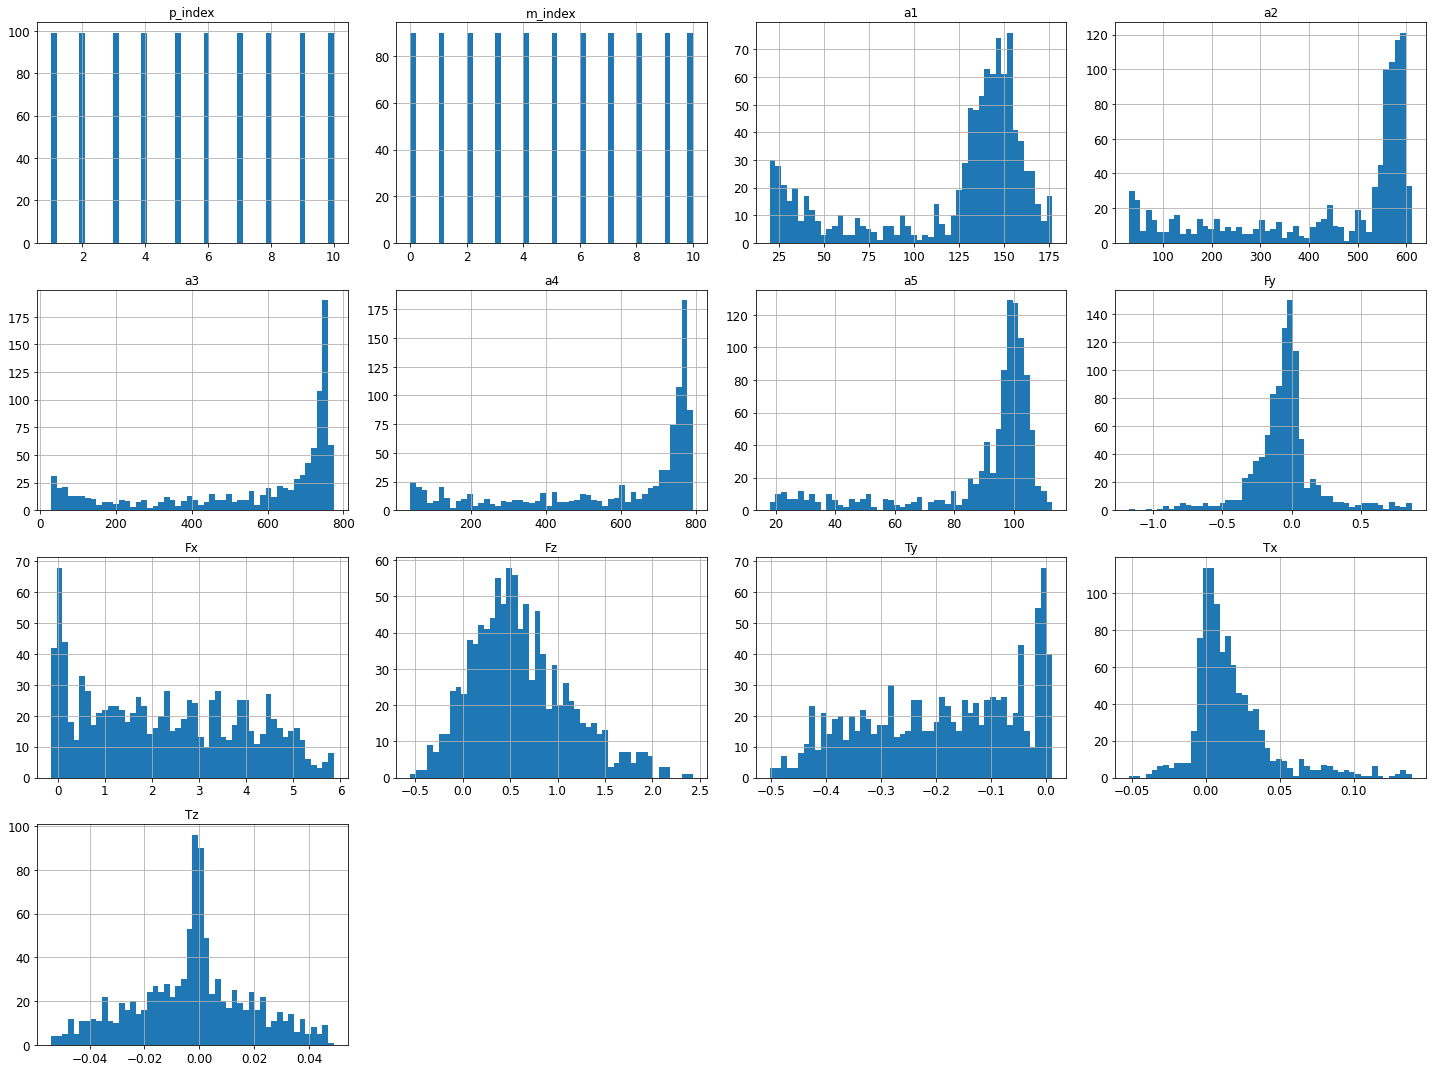

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:>

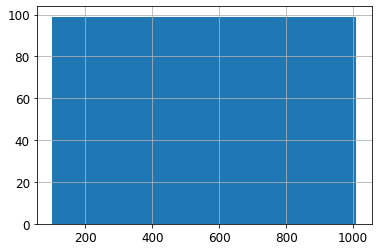

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

data["index"] = data['p_index']*100+data['m_index']
data['index'].hist()

In [5]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["index"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]

In [6]:
for set_ in (data_train, data_test):
    set_.drop("index", axis=1, inplace=True)

In [8]:
finger = data_train.copy()

Saving figure bad_visualization_plot


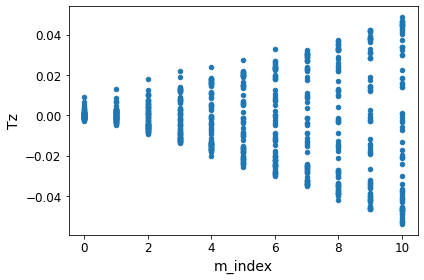

In [9]:
finger.plot(kind="scatter", x="m_index", y="Tz")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot_p_index


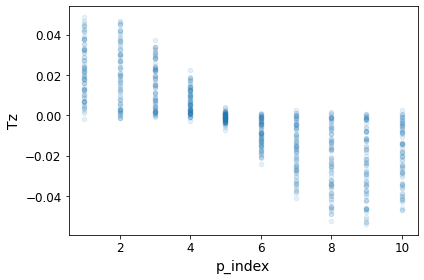

In [10]:
finger.plot(kind="scatter", x="p_index", y="Tz",alpha=0.1)
save_fig("better_visualization_plot_p_index")

Saving figure better_visualization_plot_m_index


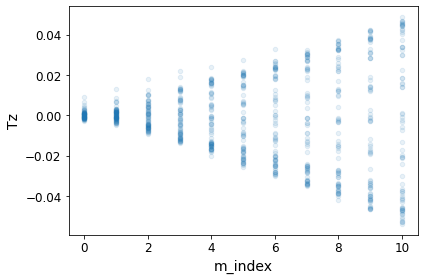

In [11]:
finger.plot(kind="scatter", x="m_index", y="Tz",alpha=0.1)
save_fig("better_visualization_plot_m_index")

Saving figure scatter_matrix_plot


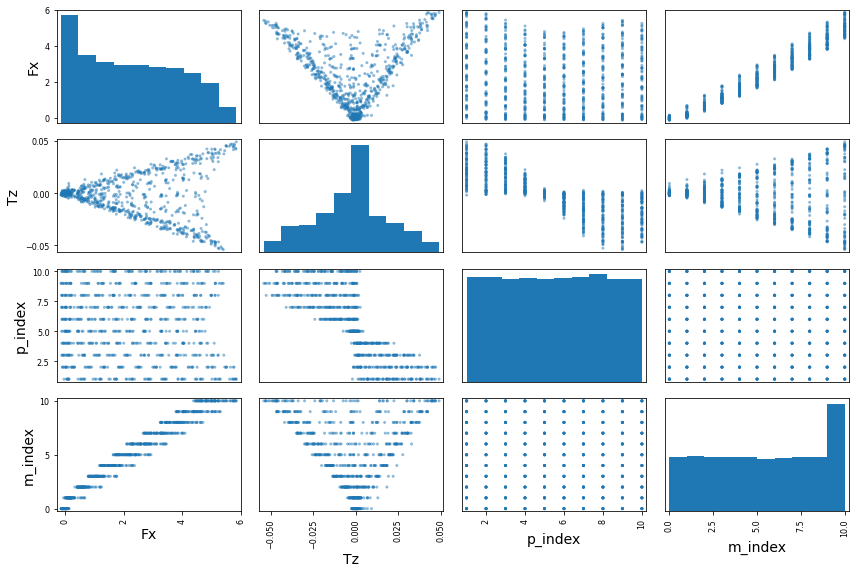

In [12]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Fx", "Tz", "p_index",
              "m_index"]
scatter_matrix(finger[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# Prepare the data 


In [13]:
finger = data_train.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1) # drop labels for training set
finger_label = data_train["p_index"].copy()
finger_label

280     6
724     6
826     6
650    10
442     1
       ..
857     8
136     3
111     1
102    10
70      7
Name: p_index, Length: 792, dtype: int64

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

finger_pre = full_pipeline.fit_transform(finger)
finger_pre

array([[ 0.6749424 , -1.18558802, -0.81579788,  0.1297142 ,  0.83899587],
       [ 0.26011912, -2.11431002, -2.10339133, -1.60219397,  0.14251662],
       [ 0.52211277,  0.68246996,  0.74829802,  0.72635242,  0.14251662],
       ...,
       [ 0.95876885,  0.63470711,  0.80607464,  0.85893869,  0.5342862 ],
       [-1.26817718,  0.84698643,  0.85559747,  0.84650872,  0.49075625],
       [ 0.84960483, -0.50629421,  0.38513063,  0.81750548,  0.57781615]])

# Select and train a model

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(finger_pre, finger_label)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error

finger_predictions = lin_reg.predict(finger_pre)
lin_mse = mean_squared_error(finger_label, finger_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.5740613634264613

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(finger_pre, finger_label)

DecisionTreeRegressor(random_state=42)

In [18]:
finger_predictions = tree_reg.predict(finger_pre)
tree_mse = mean_squared_error(finger_label, finger_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-ture

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, finger_pre, finger_label,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [27]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1.16284189 0.98734126 1.14183951 1.11093529 0.59534056]
Mean: 0.9996597014899138
Standard deviation: 0.21111678973206052


In [28]:
lin_scores = cross_val_score(lin_reg, finger_pre, finger_label,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.5634055  1.46660612 1.67149812 1.45111075 1.73011765]
Mean: 1.576547626888289
Standard deviation: 0.11008506393785139


In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(finger_pre, finger_label)

RandomForestRegressor(random_state=42)

In [30]:
finger_predictions = forest_reg.predict(finger_pre)
forest_mse = mean_squared_error(finger_label, finger_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.24631834538403197

In [31]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.72325826 0.78810616 0.81471747 0.54175407 0.78124292]
Mean: 0.7298157770599702
Standard deviation: 0.09865193956057437


In [32]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(finger_pre, finger_label)
finger_predictions = svm_reg.predict(finger_pre)
svm_mse = mean_squared_error(finger_label, finger_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

1.581184680749832

In [33]:
svm_scores = cross_val_score(svm_reg, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [1.56807172 1.46846344 1.67790033 1.44999581 1.74907693]
Mean: 1.5827016443890352
Standard deviation: 0.11629167232493083


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'bootstrap': [True],'n_estimators': [3, 10, 30,100], 'max_features': [2, 3,4,5]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10,30,100], 'max_features': [2, 3, 4,5]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(finger_pre, finger_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
grid_search.best_params_


{'bootstrap': False, 'max_features': 3, 'n_estimators': 100}

In [38]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=3, random_state=42)

In [39]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.9409739533177712 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
0.7872804612333257 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
0.7700487757179219 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.7600621043807693 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.8073772624102616 {'bootstrap': True, 'max_features': 3, 'n_estimators': 3}
0.7835808097695204 {'bootstrap': True, 'max_features': 3, 'n_estimators': 10}
0.7411752345813574 {'bootstrap': True, 'max_features': 3, 'n_estimators': 30}
0.7444306786181589 {'bootstrap': True, 'max_features': 3, 'n_estimators': 100}
0.8800937516152039 {'bootstrap': True, 'max_features': 4, 'n_estimators': 3}
0.7964513084481458 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}
0.7445173586666826 {'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
0.7309211405596782 {'bootstrap': True, 'max_features': 4, 'n_estimators': 100}
0.8651928048927139 {'bootstrap': True, 'max_features': 5, 'n_est

In [41]:
final_model_forest = grid_search.best_estimator_

final_forest_scores = cross_val_score(final_model_forest, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
final_forest_rmse_scores = np.sqrt(-final_forest_scores)
display_scores(final_forest_rmse_scores)

Scores: [0.75054152 0.78706405 0.8294649  0.48700584 0.60640411]
Mean: 0.692096084193401
Standard deviation: 0.12705124901846468


In [42]:
final_model_forest = grid_search.best_estimator_


X_test = data_test.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)
y_test = data_test["p_index"].copy()

X_test_pre = full_pipeline.transform(X_test)
final_forest_predictions = final_model_forest.predict(X_test_pre)

final_forest_mse = mean_squared_error(y_test, final_forest_predictions)
final_forest_rmse = np.sqrt(final_forest_mse)

In [43]:
final_forest_rmse

0.5692969259525208

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(finger_pre, finger_label)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.1s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.1s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   0.1s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.1s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.2s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.2s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.2s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.2s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=3.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=3.0, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] .................... C=10.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] .

[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=3.0, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=300.0, gamma=0.01, kernel=rbf .................................
[CV] .

[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.6s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.8s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=1.0, kernel=rbf, total=   0.5s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.4s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.5s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.5s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=3.0, kernel=rbf, total=   0.5s
[CV] C=1000.0, gamma=3.0, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 10.2min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [46]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.996204805137384

In [47]:
final_model_svm = grid_search.best_estimator_

final_svm_scores = cross_val_score(final_model_svm, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
final_svm_rmse_scores = np.sqrt(-final_svm_scores)
display_scores(final_svm_rmse_scores)

Scores: [0.95386251 0.68627717 1.1595003  0.88865813 1.20296958]
Mean: 0.9782535376521114
Standard deviation: 0.1882658488678762


In [48]:
final_model_svm = grid_search.best_estimator_


X_test = data_test.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)
y_test = data_test["p_index"].copy()

X_test_pre = full_pipeline.transform(X_test)
final_svm_predictions = final_model_svm.predict(X_test_pre)

final_svm_mse = mean_squared_error(y_test, final_svm_predictions)
final_svm_rmse = np.sqrt(final_svm_mse)

In [49]:
final_svm_rmse

0.7183432881770652

# Result

In [50]:
rmse = [lin_rmse,tree_rmse,forest_rmse,svm_rmse,0,0]

rmse_scores = [lin_rmse_scores.mean(),tree_rmse_scores.mean(),forest_rmse_scores.mean(),svm_rmse_scores.mean(),final_forest_rmse_scores.mean(),final_svm_rmse_scores.mean()]
rmse,rmse_scores
rmse_test = [0,0,0,0,final_forest_rmse,final_svm_rmse]

In [51]:
result = pd.DataFrame([rmse,rmse_scores,rmse_test],index = ['rmse','rmse_mean','rmse_test'],
             columns = ['liner','tree','forest','svm','final_forest','final_svm'])
result

,liner,tree,forest,svm,final_forest,final_svm
rmse,1.574061,0.00000,0.246318,1.581185,0.000000,0.000000
rmse_mean,1.576548,0.99966,0.729816,1.582702,0.692096,0.978254
rmse_test,0.000000,0.00000,0.000000,0.000000,0.569297,0.718343


Saving figure result


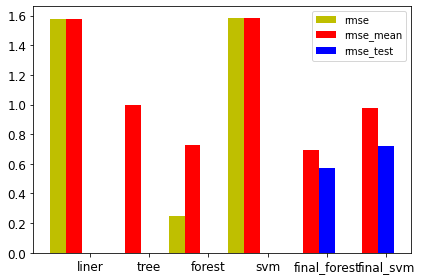

In [52]:
name_list = ['liner','tree','forest','svm','final_forest','final_svm']
num_list_1 = rmse
num_list_2 = rmse_scores
num_list_3 = rmse_test

x =list(range(len(num_list_1)))
total_width, n = 0.8, 3
width = total_width / n
 
plt.bar(x, num_list_1, width=width, label='rmse',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list_2, width=width, label='rmse_mean',tick_label = name_list,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list_3, width=width, label='rmse_test',tick_label = name_list,fc = 'b')

plt.legend()

save_fig("result")

plt.show()


# Save

In [53]:
Prepare_forest = Pipeline([
    ('preparation', full_pipeline),
    ('forest_reg', final_model_forest)
])

In [54]:
import joblib
joblib.dump(Prepare_forest, "final_model_forest_p_index.pkl") # DIFF
#...
my_model_loaded = joblib.load("final_model_forest_p_index.pkl") # DIFF

In [55]:
result.to_csv('images/finger_p_index/result.csv',index = False, header = ['liner','tree','forest','svm','final_forest','final_svm'])
